Shortest path from Fullerton to Fullerton: [0], Distance: 0.00
Shortest path from Fullerton to LongBeach: [0, 5, 1], Distance: 40.65
Shortest path from Fullerton to Placentia: [0, 2], Distance: 7.38
Shortest path from Fullerton to YorbaLinda: [0, 3], Distance: 6.18
Shortest path from Fullerton to BueunaPark: [0, 4], Distance: 11.21
Shortest path from Fullerton to Cerritos: [0, 5], Distance: 6.54
Shortest path from Fullerton to Anaheim: [0, 5, 6], Distance: 14.36
Shortest path from Fullerton to ChinoHills: [0, 7], Distance: 4.38
Shortest path from LongBeach to Fullerton: [1, 5, 0], Distance: inf
Shortest path from LongBeach to LongBeach: [1], Distance: 0.00
Shortest path from LongBeach to Placentia: [1, 5, 2], Distance: 51.40
Shortest path from LongBeach to YorbaLinda: [1, 3], Distance: 46.01
Shortest path from LongBeach to BueunaPark: [1, 4], Distance: 51.38
Shortest path from LongBeach to Cerritos: [1, 5], Distance: 34.06
Shortest path from LongBeach to Anaheim: [1, 6], Distance: 27.2

C:\Users\srisainavya\AppData\Local\Temp\ipykernel_10864\2816672252.py:40: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), edge_color=edge_colors, width=2)


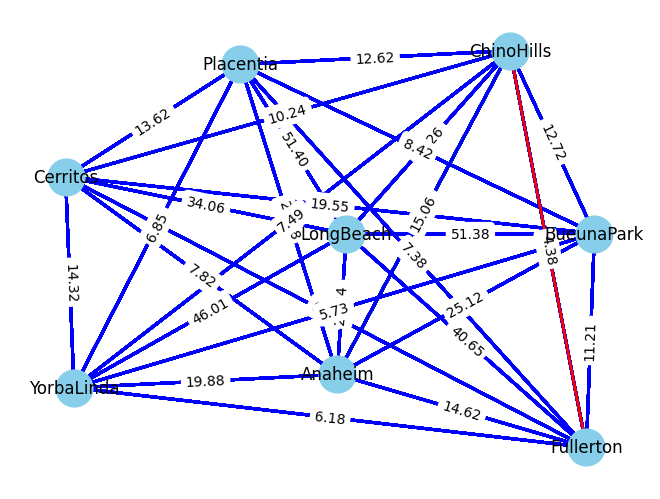

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to create a graph from a distance matrix
def create_graph(distance_matrix, node_names=None):
    num_nodes = len(distance_matrix)
    G = nx.Graph()

    # Add nodes with names
    if node_names:
        G.add_nodes_from([(i, {'name': node_names[i]}) for i in range(num_nodes)])
    else:
        G.add_nodes_from(range(num_nodes))

    # Add edges with weights
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if distance_matrix[i][j] != np.inf:
                G.add_edge(i, j, weight=distance_matrix[i][j])

    return G

# Function to visualize the graph with all shortest paths and highlight a specific path
def visualize_graph(graph, shortest_paths, highlight_nodes=None):
    pos = nx.spring_layout(graph)  # Set the layout of the nodes

    # Draw the graph
    nx.draw(graph, pos, with_labels=False, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)

    # Draw node labels
    labels = {i: graph.nodes[i]['name'] for i in graph.nodes}
    nx.draw_networkx_labels(graph, pos, labels=labels)

    # Draw edges with different colors for all shortest paths
    for source in shortest_paths:
        for target, path in shortest_paths[source].items():
            edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
            edge_colors = ['green' if (u, v) in edges or (v, u) in edges else 'blue' for u, v in graph.edges()]
            nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), edge_color=edge_colors, width=2)

    # Highlight the shortest path between specified nodes
    if highlight_nodes:
        highlight_path = shortest_paths[highlight_nodes[0]][highlight_nodes[1]]
        edges = [(highlight_path[i], highlight_path[i + 1]) for i in range(len(highlight_path) - 1)]
        nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color='red', width=2)

    # Draw edge labels (weights) separately for better visibility
    edge_labels = {(i, j): f"{graph.edges[i, j]['weight']:.2f}" for i, j in graph.edges()}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='black')

    plt.show()


# Function to find and print the shortest paths using Floyd-Warshall algorithm
def floyd_warshall(graph):
    num_nodes = len(graph.nodes)
    distances = np.full((num_nodes, num_nodes), np.inf)

    # Set diagonal elements to 0
    np.fill_diagonal(distances, 0)

    # Set known distances from the graph
    for edge in graph.edges(data=True):
        distances[edge[0]][edge[1]] = edge[2]['weight']

    # Floyd-Warshall algorithm
    for k in range(num_nodes):
        for i in range(num_nodes):
            for j in range(num_nodes):
                if distances[i][k] + distances[k][j] < distances[i][j]:
                    distances[i][j] = distances[i][k] + distances[k][j]

    # Store shortest paths in a dictionary
    shortest_paths = {source: {target: nx.shortest_path(graph, source=source, target=target, weight='weight')
                               for target in range(num_nodes)} for source in range(num_nodes)}

    # Print shortest paths
    for i in range(num_nodes):
        for j in range(num_nodes):
            try:
                path = shortest_paths[i][j]
                print(f"Shortest path from {graph.nodes[i]['name']} to {graph.nodes[j]['name']}: {path}, Distance: {distances[i][j]:.2f}")
            except nx.NetworkXNoPath:
                print(f"No path from {graph.nodes[i]['name']} to {graph.nodes[j]['name']}")

    return distances, shortest_paths

# Example distance matrix
distance_matrix = np.array([
    [0, 40.6457, 7.3793, 6.1808, 11.2105, 6.5428, 14.6207, 4.3841],
    [40.7453, 0, 51.3977, 46.0101, 51.3836, 34.0639, 27.2402, 41.2577],
    [7.3927, 51.0013, 0, 6.8542, 8.4204, 13.6222, 24.9763, 12.6185],
    [6.1356, 45.9085, 6.908, 0, 5.7338, 14.3204, 19.8835, 7.4885],
    [11.062, 51.1418, 7.8118, 5.6515, 0, 19.5537, 25.1168, 12.7218],
    [6.543, 33.8433, 13.6416, 15.365, 20.7385, 0, 7.8183, 10.2421],
    [14.5435, 27.8567, 25.1959, 19.8083, 25.1818, 7.3558, 0, 15.0559],
    [4.4165, 41.4898, 13.3549, 7.5101, 12.8836, 9.4369, 15.4648, 0]
])

# Node names
node_names = ['Fullerton', 'LongBeach', 'Placentia', 'YorbaLinda', 'BueunaPark', 'Cerritos', 'Anaheim', 'ChinoHills']

# Create the graph with node names
graph = create_graph(distance_matrix, node_names)

# Find and print shortest paths using Floyd-Warshall
distances, shortest_paths = floyd_warshall(graph)

# Automatically highlight the shortest path between nodes 0 and 7
highlight_nodes = (0, 7)

# Visualize the graph with all shortest paths and highlight the specified path
visualize_graph(graph, shortest_paths, highlight_nodes=highlight_nodes)
